## Ordinary Least Squares Regression

In this section, we will practice OLS regression on an advertising dataset. Additionally, we will learn a little about logistic regression: when to use it and how to interpret its results.

We will be introduced to two new packages: statsmodels to run the regression and plotting using matplotlib library. We can explore the matplotlib library at length in a later section.

### Resources:
- https://www.statsmodels.org/stable/regression.html#module-reference
- https://matplotlib.org/
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model(The scikit learn package has functions to run OLS and logistic regression: for your reference)


In [1]:
# First importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### OLS Regression

In [2]:
# Loading our dataframe
# It includes the data for a certain stores' sales & advertising spending through the various outlets.

data = pd.read_csv("OLSData_Advertising.csv")

In [3]:
# Briefly looking at the data 

data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
# Another way to list columns' indexes

data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
# Dropping the unnamed column, remember the .drop() function from the pandas section
# axis = 1, meaning the column. The column(s) to drop is/are in a list

data.drop(['Unnamed: 0'], axis=1, inplace = True)

In [8]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### Simple linear regression

Let's consider just the effect of TV ads on the stores' sales. 

It is always a good idea to explore the data before modelling.

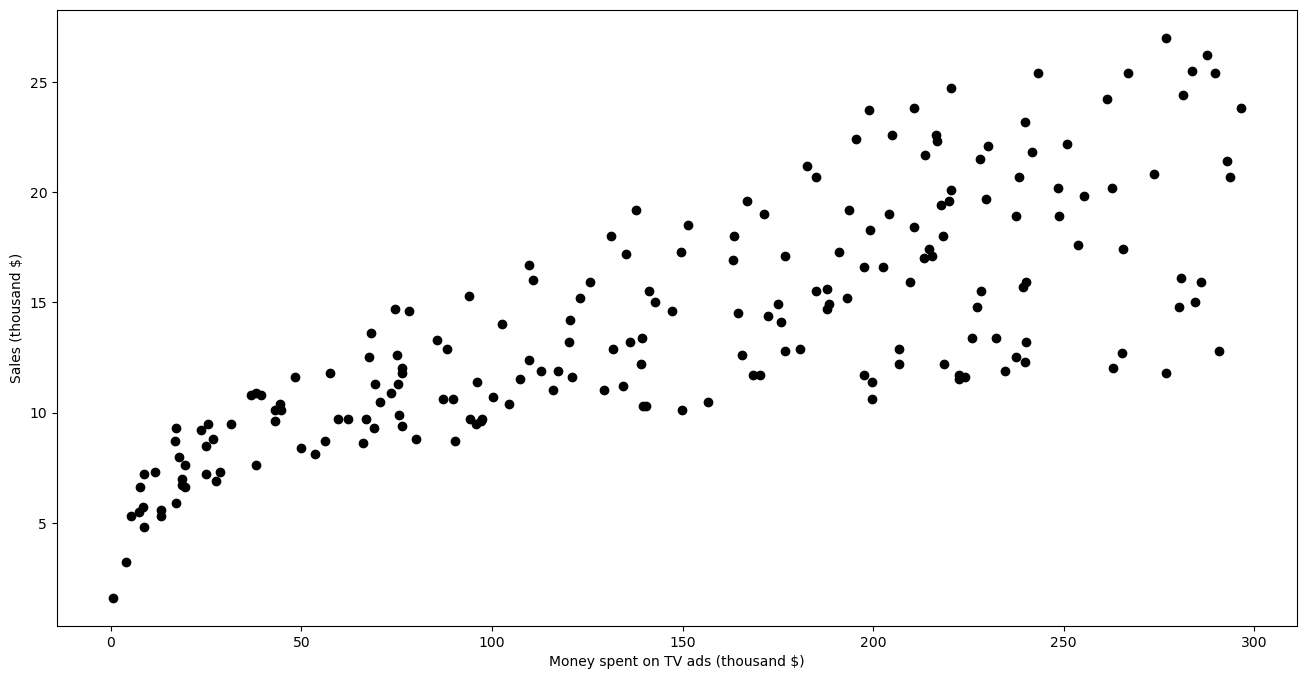

In [9]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['sales'],
    c='black'
)
plt.xlabel("Money spent on TV ads (thousand $)")
plt.ylabel("Sales (thousand $)")
plt.show()

There is a clear positive trend in the relationship between TV ads and sales.

Now let's try modeling the following simple linear regression equation:

$$
Sales = \beta_0 + \beta_1 * TV
$$

In [10]:
# Prepping the data to run OLS regression

X = data['TV']

print(X)

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64


In [11]:
y = data['sales']

print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [12]:
# Adding the constant term

X = sm.add_constant(X)

print(X)

     const     TV
0      1.0  230.1
1      1.0   44.5
2      1.0   17.2
3      1.0  151.5
4      1.0  180.8
..     ...    ...
195    1.0   38.2
196    1.0   94.2
197    1.0  177.0
198    1.0  283.6
199    1.0  232.1

[200 rows x 2 columns]


In [13]:
model = sm.OLS(y,X)

In [14]:
modelFit = model.fit()

In [15]:
modelFit

In [16]:
print(modelFit.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           1.47e-42
Time:                        19:34:59   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

Thus, the fitted model is:
$$
Sales = 7.0326 + 0.0475 * TV
$$

#### Interpretting the simple linear regression model:

The R-squared is 61.2%, which means that around 60% of the variability of sales can be explained by the amount spent on TV ads. 

Both the constant term and the coefficient for TV ads have a p-value of 0.000, which means they are significant. The significance means there is a strong correlation between these coefficients and the dependent variable/sales in this case.

**To interpret the coefficients, remember "For every unit of increase of x, y increases/decreases by ( ) units, given all else equal"**

Given all else equal, with an increase of 1 thousand dollars in TV ads, sales are estimated to increase by 0.0475 thousand: 47.5 USD.

Given all else equal and no TV ads, the sales are estimated at approximately 7 thousand.

### A useful resource:
The following blog post is very useful in explaining all the details of the above summary table: https://www.datarobot.com/blog/ordinary-least-squares-in-python/

Also, the official documentation for the regression diagnostics https://www.statsmodels.org/stable/examples/notebooks/generated/regression_diagnostics.html is very useful

#### Multiple linear regression

Let's consider the effect of TV ads, radio ads, as well as newspaper ads, on the stores' sales. 

We cannot plot all three mediums on sales as it would be a four-dimensional plot.

The model we are trying to fit is:
$$
Sales = \beta_0 + \beta_1 * TV + \beta_2 * radio + \beta_3 * newspaper
$$

In [17]:
# Some reference will create the independent variables' in the following way:
Xextra = np.column_stack((data['TV'], data['radio'], data['newspaper']))

print(Xextra)

# Creates a numpy array

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]
 [ 66.1   5.8  24.2]
 [214.7  24.    4. ]
 [ 23.8  35.1  65.9]
 [ 97.5   7.6   7.2]
 [204.1  32.9  46. ]
 [195.4  47.7  52.9]
 [ 67.8  36.6 114. ]
 [281.4  39.6  55.8]
 [ 69.2  20.5  18.3]
 [147.3  23.9  19.1]
 [218.4  27.7  53.4]
 [237.4   5.1  23.5]
 [ 13.2  15.9  49.6]
 [228.3  16.9  26.2]
 [ 62.3  12.6  18.3]
 [262.9   3.5  19.5]
 [142.9  29.3  12.6]
 [240.1  16.7  22.9]
 [248.8  27.1  22.9]
 [ 70.6  16.   40.8]
 [292.9  28.3  43.2]
 [112.9  17.4  38.6]
 [ 97.2   1.5  30. ]
 [265.6  20.    0.3]
 [ 95.7   1.4   7.4]
 [290.7   4.1   8.5]
 [266.9  43.8   5. ]
 [ 74.7  49.4  45.7]
 [ 43.1  26.7  35.1]
 [228.   37.7  32. ]
 [202.5  22.3  31.6]
 [177.   33.4  38.7]
 [293.6  27.7   1.8]
 [206.9   8.4  26.4]
 [ 25.1  25.7  43.3]
 [175.1  22.5  31.5]
 [ 89.7   9.9  35.7]
 [239.9  41.5

In [18]:
X = data[['TV', 'radio', 'newspaper']]

print(X)

# A pandas dataframe

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [19]:
y = data['sales']

print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [20]:
X = sm.add_constant(X)

print(X)

     const     TV  radio  newspaper
0      1.0  230.1   37.8       69.2
1      1.0   44.5   39.3       45.1
2      1.0   17.2   45.9       69.3
3      1.0  151.5   41.3       58.5
4      1.0  180.8   10.8       58.4
..     ...    ...    ...        ...
195    1.0   38.2    3.7       13.8
196    1.0   94.2    4.9        8.1
197    1.0  177.0    9.3        6.4
198    1.0  283.6   42.0       66.2
199    1.0  232.1    8.6        8.7

[200 rows x 4 columns]


In [21]:
model2 = sm.OLS(y,X)

In [22]:
modelFit2 = model2.fit()

In [23]:
print(modelFit2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           1.58e-96
Time:                        19:34:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

Thus, the fitted model is:
$$
Sales = 2.9389 + 0.0458 * TV + 0.1885 * radio - 0.0010 * newspaper
$$

#### Interpretting the multiple linear regression model:

The R-squared is 89.7%, which means that around 90% of the variability of sales can be explained by the amount spent on TV, radio, and newspaper ads. A much higher R-squared than the simple linear regression. **Note to use the Adj. R-squared**

The constant term, TV, and radio coefficients have a p-value of 0.000 (< 0.05), which means they are statistically significant. The significance means there is a strong correlation between these coefficients and the dependent variable/sales in this case. On the other hand, newspaper coefficient has a large p-value, thus, is statistically insignificant. 

Given all else equal, with an increase of 1 thousand dollars in TV ads, sales are estimated to increase by 0.0458 thousand: 45.8 USD.

Given all else equal, with an increase of 1 thousand dollars in radio ads, sales are estimated to increase by 0.1885 thousand: 188.5 USD.

Given all else equal, with an increase of 1 thousand dollars in newspaper ads, sales are estimated to *decrease* by 0.0010 thousand: 1 USD [insignificant; may be try another model without newspaper ads and check predictory power of the third model by using the adjusted R-squared]

Given all else equal and no ads at all, the sales are estimated at approximately 3 thousand.

Additionally, the prob(F-statistic) is approximately zero; thus, (overall) ADs-spending are statistically signficant in explaining the variance of sales.

"
- F-statistic can be used to understand if the given set of predictor variables are significant in explaining the variance of the dependent variable.
- If the F-statistic > F-critical or if the Prob (F-statistic) is approximately 0 then we reject the null hypothesis. In other words, the given regression makes sense.
* Where the null hypothesis is β1= β2 = … = βn = 0 and the Alternative hypothesis H1 would be: βi ≠ 0

"

**A useful resource to further understand the F-statistic and how to use it when evaluating models:** https://medium.com/analytics-vidhya/f-statistic-understanding-model-significance-using-python-c1371980b796 